# Assignment 1

First we need to import a few modules, execute the cell below:

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [2]:
def f(x):
    f = numpy.cos(x)
    return f;

You can use the following cell to check that your code works for scalar arguments:

In [3]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [4]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [5]:
def df_analytic(x):
    df = (-1)*numpy.sin(x)
    return df;

In [6]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [8]:
def backward_difference(f, x, dx):
    y = (f(x) - f(x-dx))/dx
    return y;

In [9]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


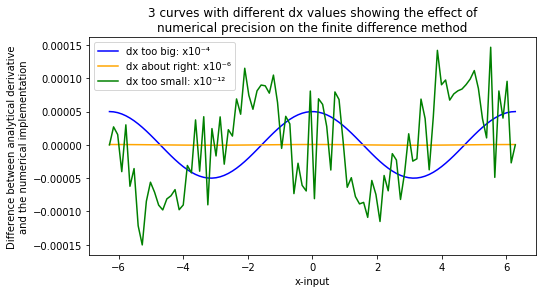

In [11]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-6)
df_dx_3 = backward_difference(f, xs, dx=1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))

plt.plot(xs, df_dx_1 - df_dx_analytical, 'blue') #toobig
plt.plot(xs, df_dx_2 - df_dx_analytical, 'orange') #exactlyright
plt.plot(xs, df_dx_3 - df_dx_analytical, 'green') #toosmall

plt.gca().legend(('dx too big: x10\u207b\u2074', 'dx about right: x10\u207b\u2076', 'dx too small: x10\u207b\u00b9\u00b2' ,))
plt.xlabel('x-input')
plt.ylabel('Difference between analytical derivative\nand the numerical implementation')
plt.title('3 curves with different dx values showing the effect of\nnumerical precision on the finite difference method')

plt.show()


**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When $\Delta x$ is too small the computer can only store numbers with a finite precision, due to limited memory and processing power. Therefore numbers that are too small cause the computer to round the numbers and cause errors. Too large dx means that the approximation will not hold as we want the dx to be a tangent to an infinitesimally small part of the curve; if dx is too large than a gradient is being taken over too big a section of the part of the curve trying to be differentiated.